In [1]:
import pandas as pd 

In [2]:
train = pd.read_csv('datasets/HousePricesTrain.csv')
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
test = pd.read_csv('datasets/test.csv')
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


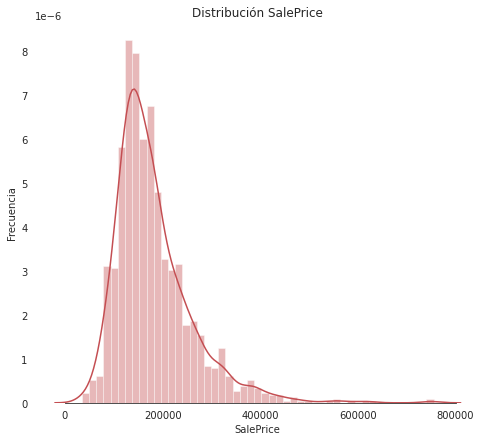

In [7]:
## Se mira la distribución de la variable de salida SalePrince
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'], color="r");
ax.xaxis.grid(False)
ax.set(ylabel="Frecuencia")
ax.set(xlabel="SalePrice")
ax.set(title="Distribución SalePrice")
sns.despine(trim=True, left=True)
plt.show()

In [8]:
## Se elimina la columna Id, tanto de train como de test
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [9]:
# log transformation.
train["SalePrice"] = np.log1p(train["SalePrice"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



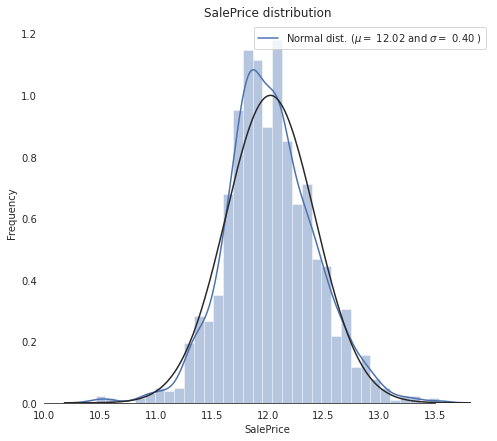

In [10]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [11]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 79)

In [12]:
#missing data
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [13]:
all_features['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64

In [14]:
all_features['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
2914    7
2915    5
2916    7
2917    5
2918    5
Name: OverallCond, Length: 2919, dtype: int64

In [15]:
all_features['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [16]:
# Se pasan a String porque son variables categóricas
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

In [17]:
## Algunss variables deben tener una categoría 'None' de acuerdo al contexto, por ejemplo en la característica PoolQC,
## Hay valores en blanco que significa que no hay piscina en la casa.
missing_categoric = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_categoric:
    all_features[i] = all_features[i].fillna('None')

In [18]:
# En estas variables, los valores nulos se deben reemplazar por cero, de acuerdo al contexto
## Por ejemplo con GarageArea, significa que no hay garage, entonces no aplica y no se podría poner el promedio, por ejemplo.
missing_numeric = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_numeric:
    all_features[i] = all_features[i].fillna(0)
    
# Según el contexto de la variable, se opta por llenar sus valores faltantes con la mediana de los de su
## mismo vecindario. 
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [19]:
## De acuerdo al contexto no se pueden llenar los valores faltantes con ceros o 'None'
# Por ser una variable categórica, tampoco por la media ni la mediana, se oprta por llenar la variable con la moda.
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [20]:
# Se llena según explicación de la descripción del dataset
all_features['Functional'] = all_features['Functional'].fillna('Typ') 

In [21]:
all_features['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
all_features['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [23]:
all_features['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [24]:
## Se llenan con la moda
all_features['Utilities'] = all_features['Utilities'].fillna('AllPub') 
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA") 
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")

In [25]:
## Se llenan con la moda
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0]) 
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])

In [26]:
## Se comprueba que no hayan datos faltantes
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SaleCondition,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
BsmtQual,0,0.0


In [27]:
all_features['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
all_features['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [29]:
all_features['PoolQC'].value_counts()

None    2909
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

In [30]:
all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [31]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

In [32]:
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

In [39]:
all_features['PoolArea'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [40]:
all_features['TotalSF'] = (all_features['TotalBsmtSF'] 
                       + all_features['1stFlrSF'] 
                       + all_features['2ndFlrSF'])

all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] 
                                 + all_features['BsmtFinSF2'] 
                                 + all_features['1stFlrSF'] 
                                 + all_features['2ndFlrSF']
                                )
                                 

all_features['Total_Bathrooms'] = (all_features['FullBath'] 
                               + (0.5 * all_features['HalfBath']) 
                               + all_features['BsmtFullBath'] 
                               + (0.5 * all_features['BsmtHalfBath'])
                              )
                               

all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] 
                              + all_features['3SsnPorch'] 
                              + all_features['EnclosedPorch'] 
                              + all_features['ScreenPorch'] 
                              + all_features['WoodDeckSF'])

In [41]:
## Se crean nuevas variables, por ejemplo, tiene sentido una variable de si hay piscina o no, 
# Que tendría el valor de 1, si poolArea tiene un valor mayor a 0.
all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [42]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(2919, 334)

In [43]:
all_features.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1460, 334), (1460,), (1459, 334))

In [45]:
Y = train_labels

In [46]:
type(Y)


pandas.core.series.Series

In [47]:
Y = Y.to_numpy()


In [48]:
X = X.to_numpy()

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [50]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [51]:
scaler = StandardScaler()
X_1 = scaler.fit_transform(X)

In [52]:
sfs1 = SFS(GradientBoostingRegressor(n_estimators=800,max_features=100), 
           k_features=250, 
           forward=False,
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=-1)
sfs1 = sfs1.fit(X_1, Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 334 out of 334 | elapsed: 42.2min finished

[2021-01-17 12:20:49] Features: 333/250 -- score: 0.9135549860261305[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 333 out of 333 | elapsed: 39.1min finished

[2021-01-17 12:59:56] Features: 332/250 -- score: 0.9158160169467768[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 332 out of 332 | elapsed: 39.6min finished

[2021-01-17 13:39:34] Features: 331/250 -- score

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 310 out of 310 | elapsed: 27.1min finished

[2021-01-18 01:01:27] Features: 309/250 -- score: 0.9147876379874461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed: 23.8min finished

[2021-01-18 01:25:17] Features: 308/250 -- score: 0.9133486313461006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed: 23.8min finished

[2021-01-18 01:49:05] Features: 307/250 -- score: 0.9140225625404227[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 286 out of 286 | elapsed: 31.3min finished

[2021-01-18 10:29:29] Features: 285/250 -- score: 0.914128313428154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 285 out of 285 | elapsed: 30.9min finished

[2021-01-18 11:00:26] Features: 284/250 -- score: 0.9154546144042826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 284 out of 284 | elapsed: 21.9min finished

[2021-01-18 11:22:17] Features: 283/250 -- score: 0.91383757890243[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | 

[Parallel(n_jobs=-1)]: Done 262 out of 262 | elapsed: 30.9min finished

[2021-01-18 21:33:16] Features: 261/250 -- score: 0.9139541006225299[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed: 31.4min finished

[2021-01-18 22:04:43] Features: 260/250 -- score: 0.9146993953240556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed: 30.4min finished

[2021-01-18 22:35:04] Features: 259/250 -- score: 0.9151725569314604[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 146 tasks     

In [53]:
sfs1.k_feature_idx_

(0,
 1,
 2,
 3,
 4,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 64,
 66,
 67,
 69,
 71,
 73,
 74,
 76,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 107,
 108,
 111,
 112,
 113,
 114,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 129,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 176,
 177,
 178,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 195,
 196,
 199,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 211,
 212,
 213,
 216,
 217,
 218,
 219,
 221,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 235,
 236,
 237,
 238,
 239,
 240,
 